# Primer modelo de clasificacion

In [1]:
# modulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de regresion logistica (Modelo Lineal generalizado)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Dataset
data = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/breast-cancer-wisconsin.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [2]:
# Eliminemos dos columnas (id, Unnamed: 32) , pues estas columnas no proveen
# informacion al modelo
data = data.drop(["id", "Unnamed: 32"], axis = 1)

# Mostremos los valores faltantes
data.isnull().sum().sum()

0

In [3]:
# Definamos a las variables independientes y a la variable dependiente
y = data.diagnosis
X = data.drop("diagnosis", axis = 1)

## Analicemos a la variable dependiente

In [4]:
# Posibles valores de la variable dependiente
y.unique()

array(['M', 'B'], dtype=object)

<Axes: xlabel='diagnosis'>

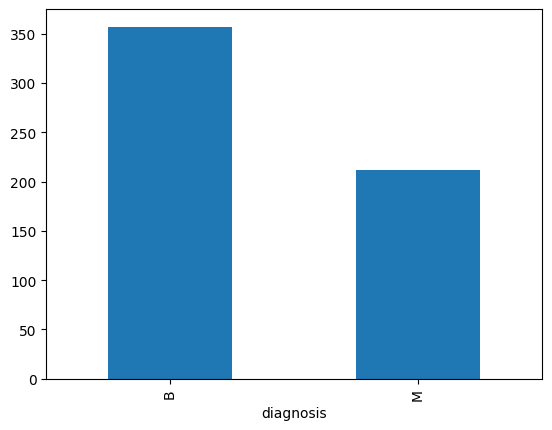

In [7]:
# Cual es la distribucion de estos valores en y
# ¿y esta balanceado o no?
y.value_counts().plot(kind = "bar")

## Construyamos nuestro primer modelo de Regresion Logistica

In [11]:
# Particionamiento de los datos
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,
                                                test_size= 0.15,
                                                # Muestreo estratificado
                                                stratify= y)

<Axes: xlabel='diagnosis'>

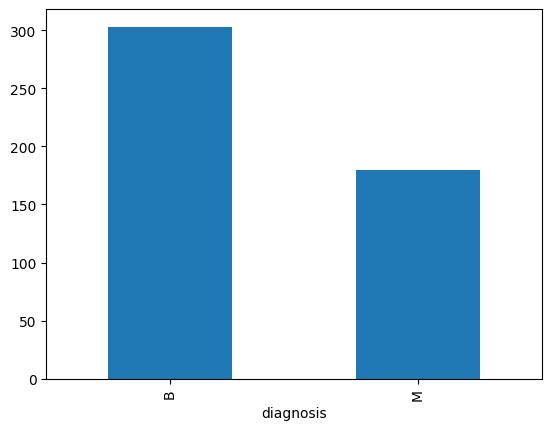

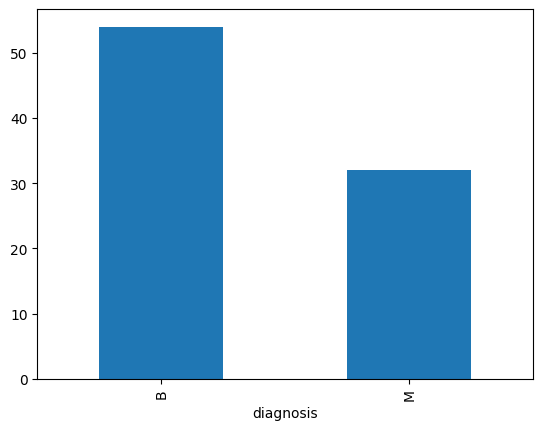

In [12]:
# Mostremos como se distribuyen los valores en Ytrain e Ytest
plt.figure()
Ytrain.value_counts().plot(kind = "bar")
plt.figure()
Ytest.value_counts().plot(kind = "bar")

In [ ]:
# Documentacion de la clase LogisticRegression
help(LogisticRegression)

In [21]:
# Instanciamos a la clase LogisticRegression
# MOdificamos el argumento max_iter por un inconveniente en la convergencia
# del metodo de optimizacion matematica que se realiza para el calculo
# de los parametros del modelo
modelo_clas_base = LogisticRegression(max_iter= 4000, tol= 10**(-6))

# Ajustamos el modelo usando el subconjunto de entrenamiento
modelo_clas_base.fit(Xtrain, Ytrain)

# Calculo de pronostico para Ytest
y_forecast = modelo_clas_base.predict(Xtest)

# Calculemos un indicador de calidad
metrics.confusion_matrix(Ytest, y_forecast)

array([[54,  0],
       [ 1, 31]])

In [23]:
metrics.accuracy_score(Ytest, y_forecast)*100

98.83720930232558

# Barrido de Hiperparametros para una Regresion Logistica

In [25]:
# INstancia la clase que nos permite probar todos los posibles escenarios
# configurados

from sklearn.model_selection import GridSearchCV

In [ ]:
# Diccionario de Hiperparametros
dict1_hp_reglog = {"C": np.logspace(-4,4,25)}

# Creamos una "plantilla" de la clase LogisticRegression para realizar
# el proceso de barrido de hiperparametros
mod_clf = LogisticRegression(max_iter = 10000)

# Configuracion del barrido de hiperparametros usando el diccionario dict1_hp_reglog
mod_clf_gs1 = GridSearchCV(estimator= mod_clf,
                           param_grid = dict1_hp_reglog,
                           cv = 5,
                           verbose = 4)

# Para cada uno de estos 25*5 = 125 modelos se procede con el ajuste
mejor_modelo = mod_clf_gs1.fit(Xtrain,Ytrain)

In [ ]:
# Analizar los objetos mod_clf_gs1 y  mejor_modelo para estudiar
# lo obtenido en estos 125 ajustes (125 modelos)

In [ ]:
# Lista de metodos/atributos
dir(mod_clf_gs1)

In [31]:
# Accedamos al campo best_estimator_
mod_clf_gs1.best_estimator_

LogisticRegression(C=46.41588833612773, max_iter=10000)

In [ ]:
# Diccionario de Hiperparametros
dict2_hp_reglog = {"C": np.linspace(1,100,30)}

# Creamos una "plantilla" de la clase LogisticRegression para realizar
# el proceso de barrido de hiperparametros
mod_clf = LogisticRegression(max_iter = 10000)

# Configuracion del barrido de hiperparametros usando el diccionario dict1_hp_reglog
mod_clf_gs2 = GridSearchCV(estimator= mod_clf,
                           param_grid = dict2_hp_reglog,
                           cv = 5,
                           verbose = 4)

# Para cada uno de estos 25*5 = 125 modelos se procede con el ajuste
mejor_modelo2 = mod_clf_gs2.fit(Xtrain,Ytrain)

In [35]:
mod_clf_gs2.best_estimator_

LogisticRegression(C=28.310344827586206, max_iter=10000)

In [ ]:
mod_clf_gs2.cv_results_

In [ ]:
# Con este mejor valor para el parametro C = 28.3 podemos ajustar un nuevo modelo
mejor_modelo_seg_iter = LogisticRegression(C = 28.3,
                                           max_iter = 10000)

# Ajusto este modelo con todos los datos : X e  y

# Ajusto este modelo con el subconjunto de entrenamiento y validar los resultados con el subconjunto de testeo

# Ajusto este modelo con todos los datos : X e  y . Para luego de obtener una muestra de estos
# calcular un indicador de calidad

# Construyamos nuestro primer arbol de decision

In [45]:
# Carguemos la clase a modelar : DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
# MOdifiquemos nuestras variables dependientes de entrenamiento y testeo
Ytrain = Ytrain.map({"M":1, "B":0})
Ytest = Ytest.map({"M":1, "B":0})

In [50]:
# Consideremos que ya tenemos cargado en memotria
modelo_clf_dt1 = DecisionTreeClassifier()

# Ajustemos el arbol de decision
modelo_clf_dt1.fit(Xtrain, Ytrain)

# Construyamos pronosticos para la variable dependiente (subconjunto de testeo)
y_forecast_dt1 = modelo_clf_dt1.predict(Xtest)

# Indicador de calidad : AUC (Area under curve) .
# Requiere como requisito calcular la curva ROC
FP_ratio, TP_ratio, thresholds = metrics.roc_curve(Ytest, y_forecast_dt1)
AUC_dt1 = metrics.auc(FP_ratio, TP_ratio)
AUC_dt1

0.9039351851851851

In [ ]:
# Documentacion de la clase DecisionTreeClassifier
help(DecisionTreeClassifier)

In [ ]:
# tipo de dato

type(modelo_clf_dt1)

In [ ]:
# Listemos los metodos/atributos de un objeto como modelo_clf_dt1
dir(modelo_clf_dt1)

In [55]:
# Accedamos al vlaor que devuelvo aplicar el metodo get_params
modelo_clf_dt1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [56]:
# Veamos la profundidad del arbol de decision recientemente construido
modelo_clf_dt1.get_depth()

8

In [57]:
# Mostremos nuestro arbol
from sklearn.tree import export_text
print(export_text(modelo_clf_dt1))

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.16
|   |   |--- feature_27 <= 0.14
|   |   |   |--- feature_10 <= 1.05
|   |   |   |   |--- feature_13 <= 38.60
|   |   |   |   |   |--- feature_19 <= 0.00
|   |   |   |   |   |   |--- feature_1 <= 19.71
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  19.71
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_19 >  0.00
|   |   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |   |--- feature_1 <= 23.20
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  23.20
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  38.60
|   |   |   |   |   |--- feature_19 <= 0.00
|   |   |   |   |   |   |--- feature_22 <= 109.40
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_22 >  109.40
|   |  

In [60]:
# Almacenemos en disco duro nuestro modelo en formato texto (str)
modelo_clf_dt1_texto = export_text(modelo_clf_dt1)
with open("modelo_clf_dt1.txt", "w") as mi_primer_arbol:
  mi_primer_arbol.write(modelo_clf_dt1_texto)

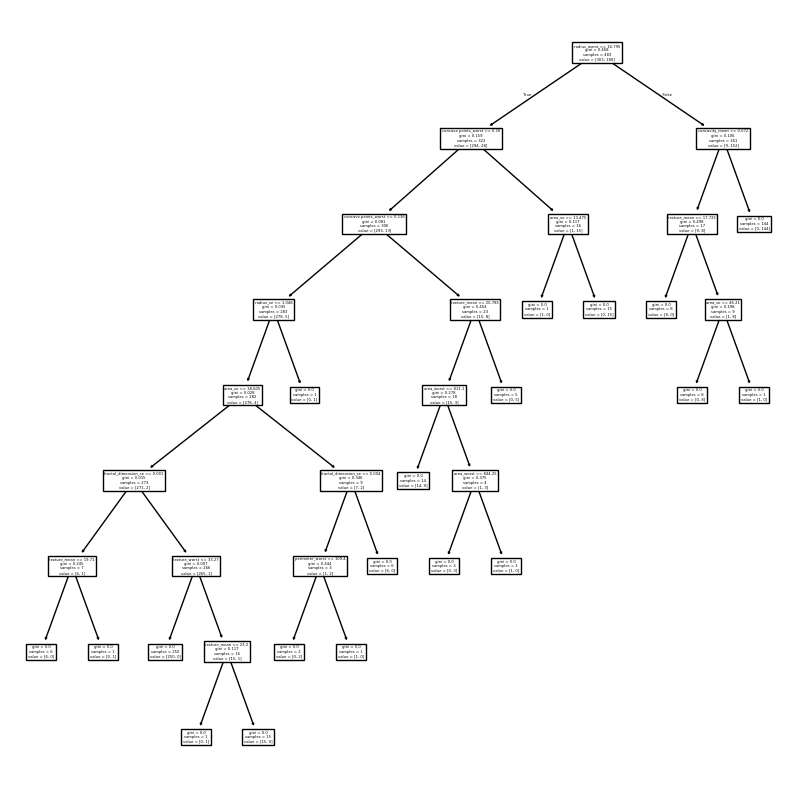

In [67]:
# Visualicemos nuestro primer arbol de decision
from sklearn.tree import plot_tree
# help(plot_tree)

# Guardemos en disco duro nuestro primer albol de decision
plt.figure(figsize = (10,10))
plot_tree(modelo_clf_dt1,feature_names=Xtrain.columns)
plt.savefig("modelo_clf_dt1.jpg",
            dpi = 600)

In [115]:
# Consideremos un conjunto de posibles profundidades para nuestro arbol
# prof1 = [5,10,15,20,25]
prof1 = [20,25,30,35]

# PAra estas profundidades del algoritmo, voy a almacenar los indicadores de calidad
kpi_results = []

# Definir que la estrategia para seleccionar el numero de variables independientes
# (features) este dado por sqrt (max_features = "sqrt")
for max_profundidad in prof1:
  # Instanciamos la clase a modelar
  dt = DecisionTreeClassifier(max_features = "sqrt",
                              max_depth = max_profundidad)
  # Ajustamos esta clase
  dt.fit(Xtrain, Ytrain)
  # Guardemos en disco duro este arbol de decision
  plt.ioff()
  plt.figure(figsize = (10,10))
  plot_tree(dt,feature_names=Xtrain.columns)
  plt.title("DecisionTree ( maxima Profundidad " + str(max_profundidad) + ")")
  plt.savefig("dt1_"+ str(max_profundidad) + ".jpg",
              dpi = 600)
  plt.ion()

  # Calculemos pronosticos
  y_forecast = dt.predict(Xtest)
  # Consideremos como KPI al indicador :metrics.auc
  FP_ratio, TP_ratio, _ = metrics.roc_curve(Ytest, y_forecast)
  kpi_auc = metrics.auc(FP_ratio, TP_ratio)
  kpi_results.append(kpi_auc*100)

# Mostremos los resultados
pd.DataFrame.from_dict({"Prof":prof1, "AUC":kpi_results}).sort_values(by = "AUC", ascending = False)

,Prof,AUC
1,25,92.824074
0,20,90.972222
2,30,90.393519
3,35,89.120370


In [118]:
import sklearn.ensemble
dir(sklearn.ensemble)
# help(sklearn.ensemble.RandomForestClassifier)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']